In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',60)

In [2]:
df = pd.read_excel('movie_metadata.xls')

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_movie_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar¬†,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.movie.com/title/tt0499549/?ref_=fn_...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End¬†,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.movie.com/title/tt0449088/?ref_=fn_...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre¬†,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.movie.com/title/tt2379713/?ref_=fn_...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises¬†,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.movie.com/title/tt1345836/?ref_=fn_...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens¬† ...,8,143,NaN,0.0,NaN,http://www.movie.com/title/tt5289954/?ref_=fn_...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.shape

(5043, 28)

In [5]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_movie_link              object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
movie_score                  float64
aspect_ratio                 float64
m

# Deal with missing value

In [6]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percentage = df.isnull().sum()/df.isnull().count()*100
    mis_val_table = pd.concat([mis_val,mis_val_percentage],axis = 1,keys =['Missing Values', '% of Total Values'])
    mis_val_table = mis_val_table[mis_val_table.iloc[:,1]!=0].sort_values('% of Total Values', ascending = False)

    #Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table.shape[0]) +
              " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table

In [7]:
missing_values_table(df).head()

Your selected dataframe has 28 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
gross,884,17.529248
budget,492,9.756098
aspect_ratio,329,6.523895
content_rating,303,6.008328
plot_keywords,153,3.033908


In [8]:
num = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget',   'title_year', 'actor_2_facebook_likes', 'movie_score',
       'aspect_ratio', 'movie_facebook_likes']
cat = ['color', 'director_name', 'actor_2_name','genres', 'actor_1_name', 'movie_title', 'actor_3_name',
       'plot_keywords', 'movie_movie_link', 'language', 'country', 'content_rating']
print(df[num].shape)
print(df[cat].shape)

(5043, 16)
(5043, 12)


In [9]:
df[num].describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [10]:
missing_values_table(df[num]).head()

Your selected dataframe has 16 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
gross,884,17.529248
budget,492,9.756098
aspect_ratio,329,6.523895
title_year,108,2.141582
director_facebook_likes,104,2.062265


## 1. Data Clean for Numerical Variables


### 1.1 Correct the wrong value for gross and budget smaller than 1000.


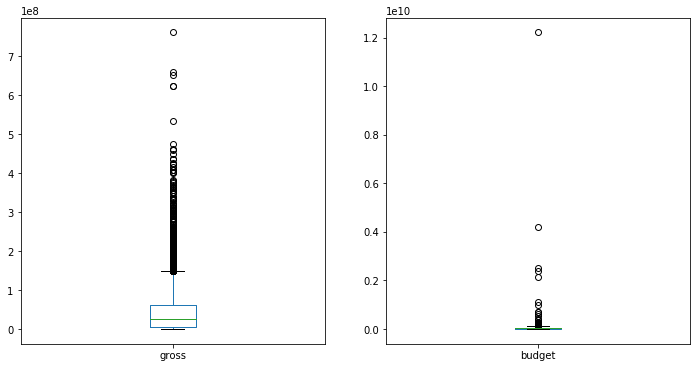

In [11]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(121)
p1 = df['gross'].plot(kind='box')
#p1.set_xlabel('host_total_listings_count')

ax2 = fig.add_subplot(122)
p2 = df['budget'].plot(kind='box')
#p2.set_xlabel('host_listings_count')

In [12]:
def scale(num):
    if num < 100:
        return num * 1000000
    elif num >= 100 and num < 1000:
        return num * 1000
    else:
        return num

df1 = df
df1[['budget', 'gross']] = df1[['budget', 'gross']].applymap(scale)
df1[['budget', 'gross']].describe()

,budget,gross
count,4.551000e+03,4.159000e+03
mean,3.975267e+07,4.846916e+07
std,2.061149e+08,6.845246e+07
min,1.100000e+03,1.111000e+03
25%,6.000000e+06,5.340988e+06
50%,2.000000e+07,2.551750e+07
75%,4.500000e+07,6.230944e+07
max,1.221550e+10,7.605058e+08


### 1.2 Fill the missing value and identify the outliers excluding gross

- Fill the missing value with median.
- Identify the outliers and correct the outliers.

In [13]:
null = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget',   'title_year', 'actor_2_facebook_likes', 'movie_score',
       'aspect_ratio', 'movie_facebook_likes']

def fill_null(df, col):
    for i in col:
        df[i] = df[i].fillna(df[i].median())
    return df

df1 = fill_null(df1, null)
missing_values_table(df1)

Your selected dataframe has 28 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
gross,884,17.529248
content_rating,303,6.008328
plot_keywords,153,3.033908
director_name,104,2.062265
actor_3_name,23,0.456078
color,19,0.376760
actor_2_name,13,0.257783
language,12,0.237954
actor_1_name,7,0.138806
country,5,0.099147


# Checking outliers with box plot.

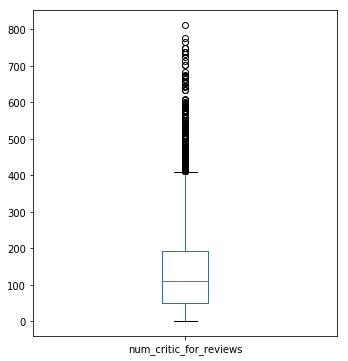

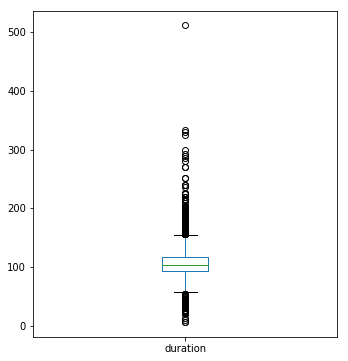

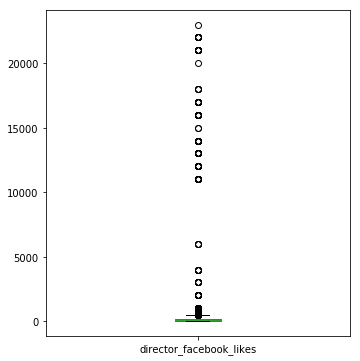

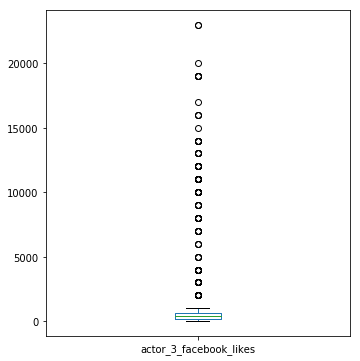

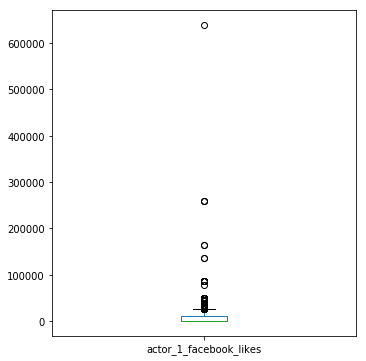

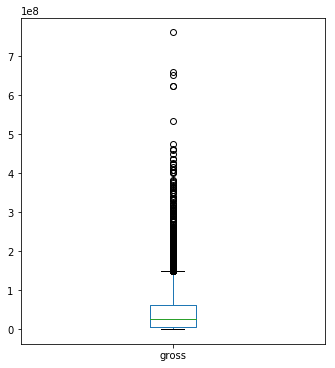

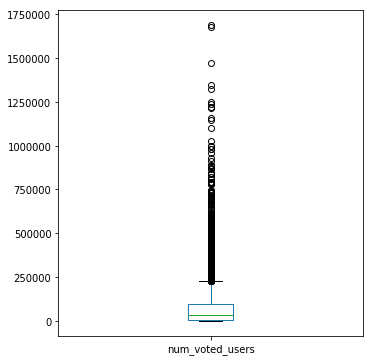

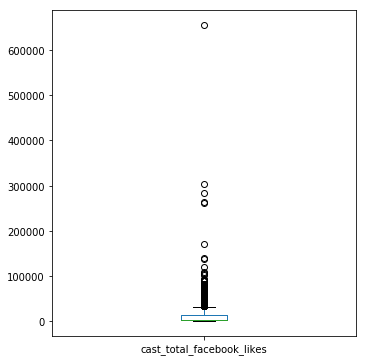

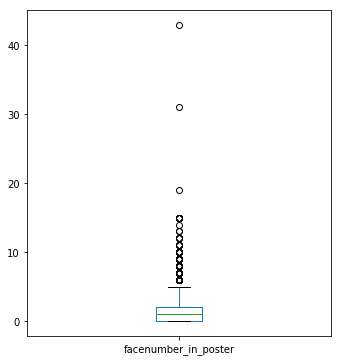

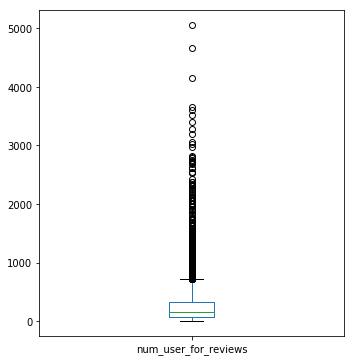

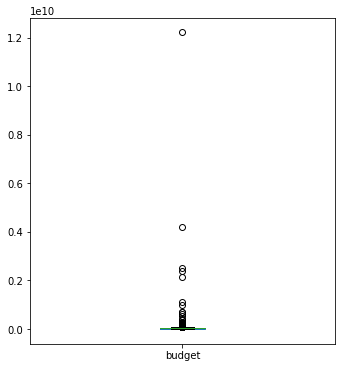

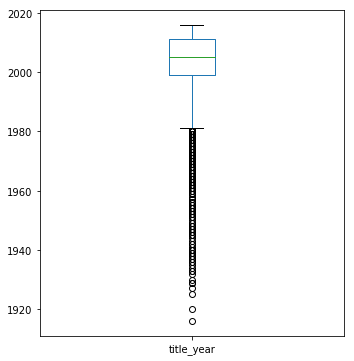

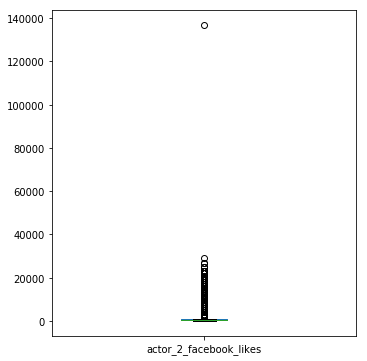

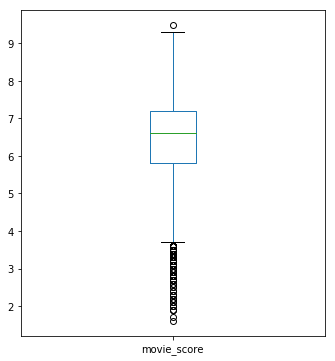

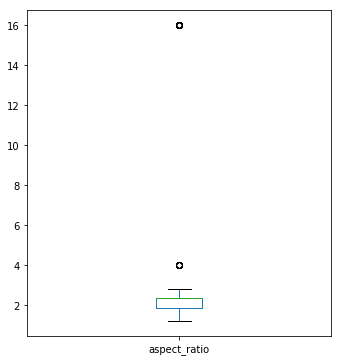

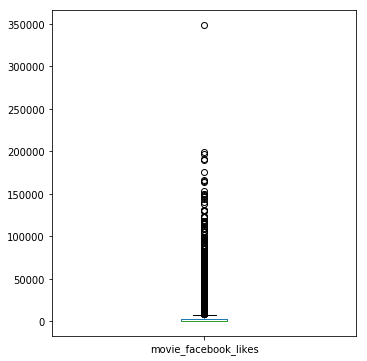

In [14]:
def box_plot(df, col):
    for i in col:
        fig = plt.figure(figsize = (12,6))
        ax1 = fig.add_subplot(121)
        p1 = df[i].plot(kind='box')
        #p1.set_xlabel('host_total_listings_count')
        
   
box_plot(df1, num)

In [15]:
outlier = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'actor_2_facebook_likes', 'movie_score',
       'aspect_ratio', 'movie_facebook_likes','gross']

def outlier_remove(df, col):
        
    for i in col:
        
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        
        df[i] = np.where(df[i] > (Q3 + 1.5 * IQR), (Q3 + 1.5 * IQR),df[i])
        df[i] = np.where(df[i] < (Q1 - 1.5 * IQR), (Q1 - 1.5 * IQR),df[i])
        
    return df

df_out = outlier_remove(df1, outlier)

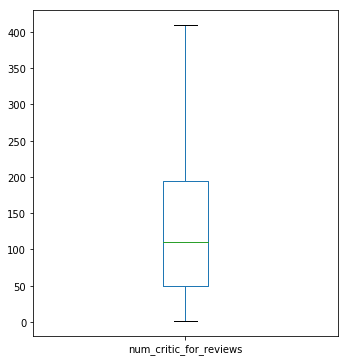

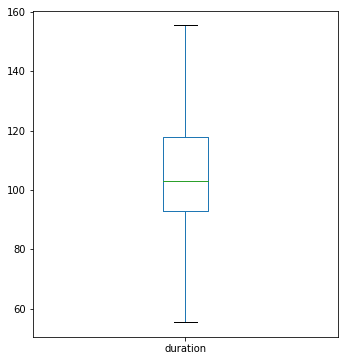

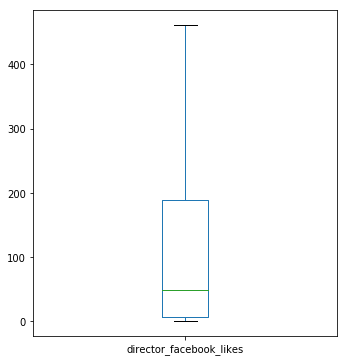

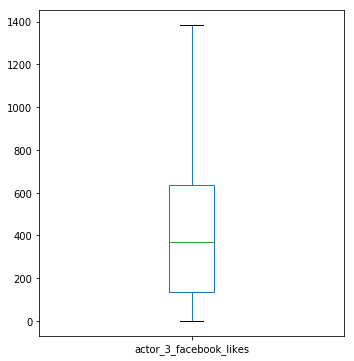

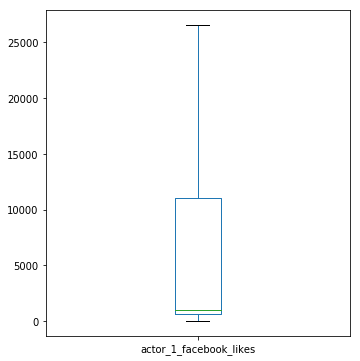

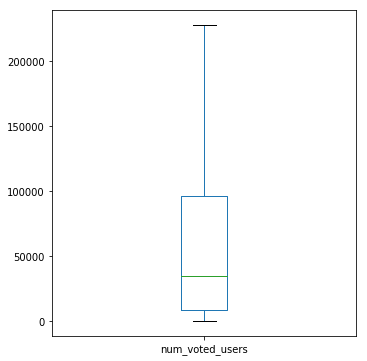

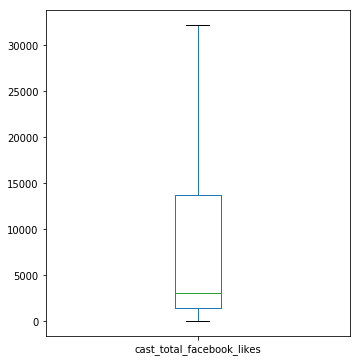

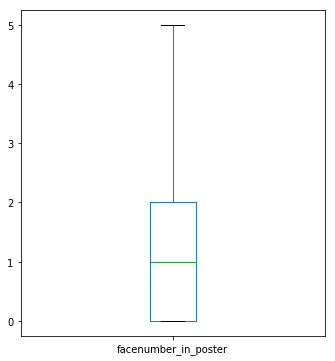

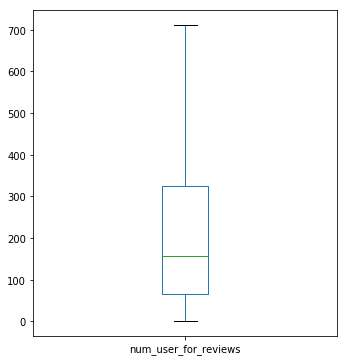

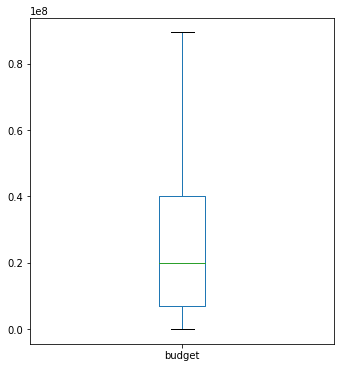

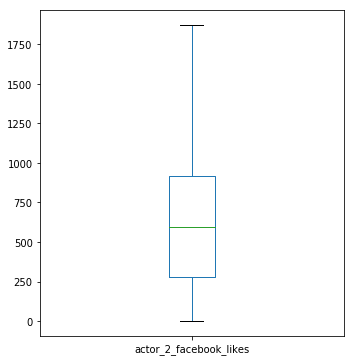

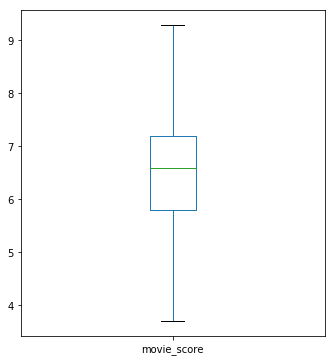

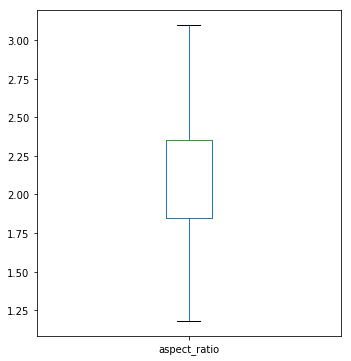

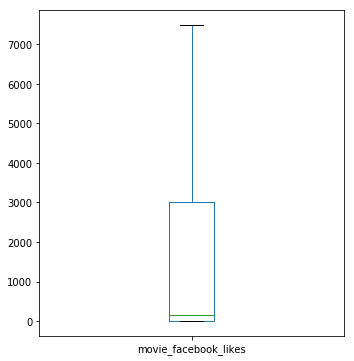

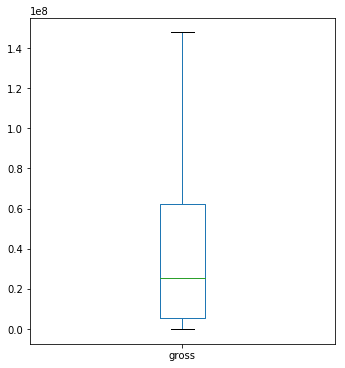

In [16]:
box_plot(df_out, outlier)


In [17]:
missing_values_table(df_out)

Your selected dataframe has 28 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
gross,884,17.529248
content_rating,303,6.008328
plot_keywords,153,3.033908
director_name,104,2.062265
actor_3_name,23,0.456078
color,19,0.376760
actor_2_name,13,0.257783
language,12,0.237954
actor_1_name,7,0.138806
country,5,0.099147


In [18]:
print(df_out.shape)
df_out.head()

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_movie_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,410.0,155.5,0.0,855.00,Joel David Moore,1000.00,147762112.5,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar¬†,227882.25,4834.00,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.movie.com/title/tt0499549/?ref_=fn_...,712.5,English,USA,PG-13,89500000.0,2009.0,936.0,7.9,1.78,7500.0
1,Color,Gore Verbinski,302.0,155.5,462.0,1000.00,Orlando Bloom,26576.75,147762112.5,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End¬†,227882.25,32274.75,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.movie.com/title/tt0449088/?ref_=fn_...,712.5,English,USA,PG-13,89500000.0,2007.0,1873.5,7.1,2.35,0.0
2,Color,Sam Mendes,410.0,148.0,0.0,161.00,Rory Kinnear,11000.00,147762112.5,Action|Adventure|Thriller,Christoph Waltz,Spectre¬†,227882.25,11700.00,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.movie.com/title/tt2379713/?ref_=fn_...,712.5,English,UK,PG-13,89500000.0,2015.0,393.0,6.8,2.35,7500.0
3,Color,Christopher Nolan,410.0,155.5,462.0,1385.75,Christian Bale,26576.75,147762112.5,Action|Thriller,Tom Hardy,The Dark Knight Rises¬†,227882.25,32274.75,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.movie.com/title/tt1345836/?ref_=fn_...,712.5,English,USA,PG-13,89500000.0,2012.0,1873.5,8.5,2.35,7500.0
4,NaN,Doug Walker,110.0,103.0,131.0,371.50,Rob Walker,131.00,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens¬† ...,8.00,143.00,NaN,0.0,NaN,http://www.movie.com/title/tt5289954/?ref_=fn_...,156.0,NaN,NaN,NaN,20000000.0,2005.0,12.0,7.1,2.35,0.0


## 2. Clean category variables 

In [19]:
df_out[cat].head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_movie_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar¬†,Wes Studi,avatar|future|marine|native|paraplegic,http://www.movie.com/title/tt0499549/?ref_=fn_...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End¬†,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.movie.com/title/tt0449088/?ref_=fn_...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre¬†,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.movie.com/title/tt2379713/?ref_=fn_...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises¬†,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.movie.com/title/tt1345836/?ref_=fn_...,English,USA,PG-13
4,NaN,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens¬† ...,NaN,NaN,http://www.movie.com/title/tt5289954/?ref_=fn_...,NaN,NaN,NaN


### 2.1  Create an indicative variable for diector who won Academy Awards or not.

In [20]:

def oscars(i):
    
    lst = ['Alejandro González Iñárritu','Alfonso Cuarón',
    'Ang Lee','Anthony Minghella','Barry Levinson','Bernardo Bertolucci',
    'Billy Wilder','Bob Fosse','Carol Reed','Clint Eastwood',
    'Damien Chazelle', 'Danny Boyle','David Lean',
    'Delbert Mann','Ella Kazan','Francis Ford Coppola',
    'Frank Borzage','Frank Capra','Frank Lloyd','Franklin J. Schaffner',
    'Fred Zinnemann','George Cukor','George Roy Hill','George Stevens',
    'Gigi','James Cameron','James L Brooks','Jerome Robbins','John Ford',
    'John G Avildsen','John Huston','John Schlesinger','Jonathan Demme',
    'Joseph L. Mankiewicz','Kathryn Bigelow','Kevin Costner','Leo McCarey',
    'Lewis Milestone','Martin Scorsese','Mel Gibson','Michael Cimino',
    'Michael Curtiz','Michel Hazanavicius','Mike Nichols','Milos Forman',
    'Norman Taurog','Oliver Stone','Peter Jackson','Richard Attenborough',
    'Robert Benton','Robert Redford','Robert Wise','Robert Zemeckis','Roman Polanski',
    'Ron Howard','Sam Mendes','Steven Soderbergh','Steven Spielberg','Sydney Pollack',
    'Tom Hooper','Tony Richardson','Victor Fleming','Warren Beatty','William Friedkin',
    'William Wyler','Woody Allen']
    
    if i in lst:
        return 1
    else:
        return 0
    
df_out['oscars']=df_out['director_name'].apply(oscars)

### 2.2 Clean Categorical variables color, language, country, and rating. 

In [21]:
def category_clean(df):
    color = ['Color']
    language=['English']
    NorthAmerica=['USA', 'Canada']
    Europe=['UK','France','Germany','Spain','Italy','Ireland','Denmark']
    rating = ['R',  'PG-13', 'PG']  
                        
    df['color_N'] = np.where(df['color'].isin(color), 1, 0) 
    df['language_N'] = np.where(df.language.isin(language), 1, 0)
    df['North_America'] = np.where(df.country.isin(NorthAmerica), 1, 0)
    df['Europe'] = np.where(df.country.isin(Europe), 1, 0)
    df['content_rating_N'] = np.where(df.content_rating.isin(rating), df['content_rating'], 0)
    
    

In [22]:
category_clean(df_out)
print(df_out.shape)
missing_values_table(df_out)

(5043, 34)
Your selected dataframe has 34 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
gross,884,17.529248
content_rating,303,6.008328
plot_keywords,153,3.033908
director_name,104,2.062265
actor_3_name,23,0.456078
color,19,0.376760
actor_2_name,13,0.257783
language,12,0.237954
actor_1_name,7,0.138806
country,5,0.099147


### 2.3 Clean the genres variables 

In [23]:
df2 = df_out
df2['genres_N']=df2['genres'].str.replace('|',' ')
df2['genres_N']=df2['genres_N'].str.replace('musical','music')
df2['genres_N']=df2['genres_N'].str.replace('Sci-Fi','SciFi')

cv = CountVectorizer()
    
X = cv.fit_transform(df2['genres_N']).toarray()
X = pd.DataFrame(X)
res = {v: k for k, v in cv.vocabulary_.items()}
X.columns = pd.Series(X.columns).map(res)
df2 = pd.concat([df2, X], axis = 1)

In [24]:
res

{0: 'action',
 1: 'adventure',
 2: 'animation',
 3: 'biography',
 4: 'comedy',
 5: 'crime',
 6: 'documentary',
 7: 'drama',
 8: 'family',
 9: 'fantasy',
 10: 'film',
 11: 'game',
 12: 'history',
 13: 'horror',
 14: 'music',
 15: 'musical',
 16: 'mystery',
 17: 'news',
 18: 'noir',
 19: 'reality',
 20: 'romance',
 21: 'scifi',
 22: 'short',
 23: 'show',
 24: 'sport',
 25: 'thriller',
 26: 'tv',
 27: 'war',
 28: 'western'}

In [25]:
missing_values_table(df2).head()

Your selected dataframe has 64 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
gross,884,17.529248
content_rating,303,6.008328
plot_keywords,153,3.033908
director_name,104,2.062265
actor_3_name,23,0.456078


In [26]:
df2.shape

(5043, 64)

In [27]:
print(df2.shape)
print(df_out.shape)

(5043, 64)
(5043, 35)


## 2.4 Transfer content-rating to dummy variable

In [28]:
dummy = ['content_rating_N']
df3 = pd.get_dummies(df2, columns = dummy, drop_first = False)

In [29]:
df3.shape

(5043, 67)

## Keep features 

In [30]:
df3.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_movie_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'movie_score', 'aspect_ratio', 'movie_facebook_likes', 'oscars',
       'color_N', 'language_N', 'North_America', 'Europe', 'genres_N',
       'action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'film', 'game', 'history',
       'horror', 'music', 'musical', 'mystery', 'news', 'noir', 'reality',
       'romance', 'scifi', 'short', 'show', 'sport', 'thriller', 'tv', 'war',
       'western', 'content_rating_N_0', 'content_rat

In [31]:
to_drop = ['color','director_name','actor_2_name','actor_1_name','movie_title','actor_3_name','genres',
          'plot_keywords', 'movie_movie_link','genres_N','language','country','content_rating','content_rating_N_0']

In [32]:
df_final = df3.drop(to_drop, axis=1)

In [33]:
df_final.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'movie_score', 'aspect_ratio',
       'movie_facebook_likes', 'oscars', 'color_N', 'language_N',
       'North_America', 'Europe', 'action', 'adventure', 'animation',
       'biography', 'comedy', 'crime', 'documentary', 'drama', 'family',
       'fantasy', 'film', 'game', 'history', 'horror', 'music', 'musical',
       'mystery', 'news', 'noir', 'reality', 'romance', 'scifi', 'short',
       'show', 'sport', 'thriller', 'tv', 'war', 'western',
       'content_rating_N_PG', 'content_rating_N_PG-13', 'content_rating_N_R'],
      dtype='object')

In [34]:
df_final.head()
missing_values_table(df_final)

Your selected dataframe has 53 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
gross,884,17.529248


In [35]:
df_final.to_csv('cleaned.csv')

## Data without gross 

In [36]:
df_pred = df_final.loc[pd.isnull(df['gross'])]
#df_pred = df_pred.reset_index(drop=True)
df_pred.shape

(884, 53)

In [37]:
# Only keep the data with gross number
df_train = df_final.loc[pd.notnull(df_final['gross'])]
df_train = df_train.reset_index(drop=True)
print(df_train.shape)

df_train['profit'] = round((df_train['gross'] - df_train['budget'])/df_train['budget'], 2)

col = ['profit']
df_train = outlier_remove(df_train, col)
print(df_train.shape)

(4159, 53)
(4159, 54)


In [38]:
df_pred.to_csv('cleaned_pred.csv')
df_train.to_csv('cleaned_train.csv')